In [4]:
import pandas as pd
import yfinance as yf
import numpy as np

In [5]:
def bollinger_band_strategy(ticker, window, std_dev):
    # Download historical data for `ticker`
    data = yf.download(ticker, '2022-01-01')

    # Calculate the daily returns
    data['returns'] = data['Adj Close'].pct_change()

    # Calculate the cumulative returns
    data['cumulative_returns'] = (1 + data['returns']).cumprod()

    # Create a moving average and bollinger bands
    data['ma'] = data['Adj Close'].rolling(window).mean()
    data['upper'] = data['ma'] + std_dev * data['Adj Close'].rolling(window).std()
    data['lower'] = data['ma'] - std_dev * data['Adj Close'].rolling(window).std()

    # Short when the price is above the upper bollinger band
    data['signal'] = 0
    data.loc[data['Adj Close'] > data['upper'], 'signal'] = 1

    # Long when the price is below the lower bollinger band
    data.loc[data['Adj Close'] < data['lower'], 'signal'] = -1

    # Replace 0s with NaNs
    data['signal'].replace(0, np.nan, inplace=True)

    # Forward fill signal
    data['signal'].fillna(method='ffill', inplace=True)

    # Replace Nan with 0s
    data['signal'].replace(np.nan, 0, inplace=True)

    # Calculate the strategy returns
    data['strategy_returns'] = data['signal'].shift(1) * data['returns']

    # Calculate the cumulative strategy returns
    data['cumulative_strategy_returns'] = (1 + data['strategy_returns']).cumprod()

    # # Plot the cumulative strategy and cumulative returns
    # data[['cumulative_strategy_returns', 'cumulative_returns']].plot()

    return data

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

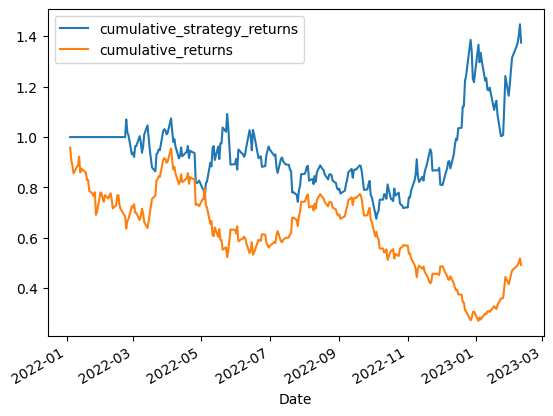

In [6]:
tsla = bollinger_band_strategy('TSLA', 20, 2)

# Plot the cumulative strategy and cumulative returns
tsla[['cumulative_strategy_returns', 'cumulative_returns']].plot()